In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import meerkat as mk

In [3]:
dp = mk.datasets.get("imagenette")



In [4]:
import meerkat.ops.groupby as gb
from meerkat import NumpyArrayColumn
import numpy as np
from meerkat import DataPanel
dp = DataPanel({
        'a': NumpyArrayColumn([1, 2, 2, 1, 3, 2, 3]),
        'name': NumpyArrayColumn(np.array(['sam', 'liam', 'sam', 'owen', 'liam', 'connor', 'connor'], dtype = str)),
        'b': NumpyArrayColumn([1, 2, 3, 4, 5, 6, 7]),
        'c': NumpyArrayColumn([1.0, 3.2, 2.1, 4.3, 5.4, 6.5, 7.6])
    })

df = gb.groupby(dp, by='a')

print(df['b'])
df[['b', 'c']].mean()

,b (NumpyArrayColumn),c (NumpyArrayColumn),a (NumpyArrayColumn)
0,2.500000,2.650000,1
1,3.666667,3.933333,2
2,6.000000,6.500000,3


In [5]:
# Demo
# These work.
df['a']
# print(df['b'].mean())


# The following do not because I chose to create a BaseGroupBy class
#  that everything inherits from.
# 'DataPanel' object has no attribute 'mean'.

# print(df[['a']].mean())




In [6]:
b = np.zeros((7, 4))
b[0, 0] = 4
b[1, 1] = 3
dp = DataPanel({
    'a': NumpyArrayColumn([1, 2, 2, 1, 3, 2, 3]),
    'name': NumpyArrayColumn(np.array(['a', 'b', 'a', 'c', 'b', 'd', 'd'], dtype = str)),
    'b': NumpyArrayColumn(b),
    'c': NumpyArrayColumn([1.0, 3.2, 2.1, 4.3, 5.4, 6.5, 7.6])
    })

df = dp.groupby('a')
out = df["b"].mean(axis = 0)

In [13]:
out

,b (NumpyArrayColumn),a (NumpyArrayColumn)
0,"[2.0, 0.0, 0.0, 0.0]",1
1,"[0.0, 1.0, 0.0, 0.0]",2
2,"[0.0, 0.0, 0.0, 0.0]",3


In [15]:
dp["b"]

,(NumpyArrayColumn)
0,"[4.0, 0.0, 0.0, 0.0]"
1,"[0.0, 3.0, 0.0, 0.0]"
2,"[0.0, 0.0, 0.0, 0.0]"
3,"[0.0, 0.0, 0.0, 0.0]"
4,"[0.0, 0.0, 0.0, 0.0]"
5,"[0.0, 0.0, 0.0, 0.0]"
6,"[0.0, 0.0, 0.0, 0.0]"


,img_path (PandasSeriesColumn),label (PandasSeriesColumn),label_id (PandasSeriesColumn),label_idx (PandasSeriesColumn),split (PandasSeriesColumn),img (ImageColumn)
0,train/n02979186/n02979186_9036.JPEG,cassette player,n02979186,482,train,
1,train/n02979186/n02979186_11957.JPEG,cassette player,n02979186,482,train,
2,train/n02979186/n02979186_9715.JPEG,cassette player,n02979186,482,train,
3,train/n02979186/n02979186_21736.JPEG,cassette player,n02979186,482,train,
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,cassette player,n02979186,482,train,
...,...,...,...,...,...,...
13389,val/n03425413/n03425413_17521.JPEG,gas pump,n03425413,571,valid,
13390,val/n03425413/n03425413_20711.JPEG,gas pump,n03425413,571,valid,
13391,val/n03425413/n03425413_19050.JPEG,gas pump,n03425413,571,valid,
13392,val/n03425413/n03425413_13831.JPEG,gas pump,n03425413,571,valid,

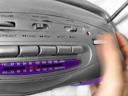
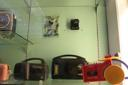
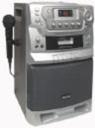
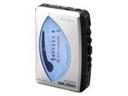
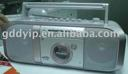
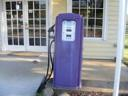
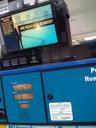
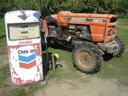
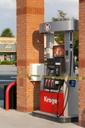
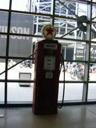

In [34]:
dp = mk.datasets.get("imagenette")
dp

In [37]:
dp["mean_color"] = dp["img"].map(lambda x: np.array(x).mean(axis=(0,1)), pbar=True)

  0%|          | 0/13394 [00:00<?, ?it/s]

In [33]:
dp.groupby("label")["mean_color"].mean(axis=0)

,mean_color (NumpyArrayColumn),label (PandasSeriesColumn)
0,"[131.61022876039007, 127.38068634727605, 123.95438218571711]",cassette player
1,"[129.71891376015418, 122.80859050057, 111.82975066937232]",chainsaw
2,"[107.21309641657878, 105.50154764217454, 102.71316206238356]",church
3,"[114.43275680503707, 111.6762508392646, 98.4922892545524]",english springer spaniel
4,"[110.1711863646949, 98.11608757644655, 86.08412476020979]",french horn
5,"[116.96131897875614, 120.82481196140681, 118.42910708421972]",garbage truck
6,"[117.53785503539153, 110.02785255213281, 104.58773551195688]",gas pump
7,"[114.06176493661128, 118.08734345103629, 98.8501908999849]",golf ball
8,"[129.0015606809407, 142.70545074610195, 157.73612403202506]",parachute
9,"[107.66470397243765, 108.86106519823764, 91.68001633913659]",tench


In [39]:
dp["blue"] = dp["mean_color"][:, -1]
dp["is_blue"] = dp["blue"] > 100

In [40]:
dp.groupby(["label", "is_blue"])["mean_color"].mean(axis=0)

,mean_color (NumpyArrayColumn),label (PandasSeriesColumn),is_blue (NumpyArrayColumn)
0,"[89.99496416055352, 79.46935393022434, 70.63840495715104]",cassette player,False
1,"[152.4872969856693, 151.4162935998795, 150.70132960516443]",cassette player,True
2,"[102.17701137034851, 93.23888500925877, 75.82561860066808]",chainsaw,False
3,"[152.12180229296996, 146.86091654160734, 141.11591057365337]",chainsaw,True
4,"[91.78829211829422, 78.87041330502656, 64.87650299117514]",church,False
...,...,...,...
15,"[141.79272175687373, 147.09965182688038, 141.52797084926888]",golf ball,True
16,"[108.76167700716873, 99.60890594256333, 78.93274564536317]",parachute,False
17,"[131.2134789460283, 147.41526213383452, 166.34816127559617]",parachute,True
18,"[93.79695377045967, 94.28418674729966, 73.08247421357721]",tench,False


In [42]:
gb = dp.groupby(["label", "is_blue"])

In [43]:
gb